In [21]:
from astropy.io import fits
import matplotlib.pyplot as plt
import glob
from kpfpipe.models.level0 import KPF0
%matplotlib inline

In [53]:
fits.open('/Users/paminabby/Desktop/0503/post_green/KP.20220503.00180.16_2D.fits').info()

Filename: /Users/paminabby/Desktop/0503/post_green/KP.20220503.00180.16_2D.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     113   ()      
  1  RECEIPT       1 BinTableHDU     29   2R x 10C   [26A, 6A, 12A, 40A, 3A, 9A, 1A, 21A, 40A, 4A]   
  2  CONFIG        1 BinTableHDU     13   0R x 2C   [D, D]   
  3  GREEN_AMP1    1 ImageHDU        23   (2144, 2140)   int32   
  4  GREEN_AMP2    1 ImageHDU        23   (2144, 2140)   int32   
  5  GREEN_AMP3    1 ImageHDU        23   (2144, 2140)   int32   
  6  GREEN_AMP4    1 ImageHDU        23   (2144, 2140)   int32   
  7  GREEN_CCD     1 ImageHDU         9   (4080, 4080)   float64   
  8  GREEN_VAR     1 ImageHDU         8   (0,)      
  9  RED_AMP1      1 ImageHDU        23   (2144, 4180)   int32   
 10  RED_AMP2      1 ImageHDU        23   (2144, 4180)   int32   
 11  RED_AMP3      1 ImageHDU        22   (0,)      
 12  RED_AMP4      1 ImageHDU        22   (0,)      
 13  RED_CCD       1

In [51]:
direct = '/Users/paminabby/Desktop/0503/*.fits'
directglob = glob.glob(direct)

In [52]:
for file in directglob:
    print(file)
    filee = fits.open(file)
    filee.info()
    #print(filee['RED_AMP1'].header['CCDGAIN'])
    obj = KPF0()
    
    obj['GREEN_AMP1'] = filee['Green_ext1'].data
    obj['GREEN_AMP2'] = filee['Green_ext2'].data
    obj['GREEN_AMP3'] = filee['Green_ext3'].data
    obj['GREEN_AMP4'] = filee['Green_ext4'].data
    obj['RED_AMP1'] = filee['Red_ext1'].data
    obj['RED_AMP2'] = filee['Red_ext2'].data
    
    obj.header['GREEN_AMP1']['CCDGAIN'] = 5.2
    obj.header['GREEN_AMP2']['CCDGAIN'] = 5.32
    obj.header['GREEN_AMP3']['CCDGAIN'] = 5.3
    obj.header['GREEN_AMP4']['CCDGAIN'] = 5.4
    obj.header['RED_AMP1']['CCDGAIN'] = 5.1
    obj.header['RED_AMP2']['CCDGAIN'] = 5.21

    obj.to_fits(file)

/Users/paminabby/Desktop/0503/KP.20220503.01083.55.fits
Filename: /Users/paminabby/Desktop/0503/KP.20220503.01083.55.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     134   ()      
  1  Green_ext1    1 ImageHDU        10   (2144, 2140)   int32   
  2  Green_ext2    1 ImageHDU        10   (2144, 2140)   int32   
  3  Green_ext3    1 ImageHDU        10   (2144, 2140)   int32   
  4  Green_ext4    1 ImageHDU        10   (2144, 2140)   int32   
  5  Red_ext1      1 ImageHDU        10   (2144, 4180)   int32   
  6  Red_ext2      1 ImageHDU        10   (2144, 4180)   int32   
/Users/paminabby/Desktop/0503/KP.20220503.00180.16.fits
Filename: /Users/paminabby/Desktop/0503/KP.20220503.00180.16.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     134   ()      
  1  Green_ext1    1 ImageHDU        10   (2144, 2140)   int32   
  2  Green_ext2    1 ImageHDU        10   (2144, 2140)   int32   
  

In [46]:
green = fits.open('/Users/paminabby/Desktop/20220429/post_green/KP.20220429.0781.60_2D.fits')
green.info()

Filename: /Users/paminabby/Desktop/20220429/post_green/KP.20220429.0781.60_2D.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     113   ()      
  1  RECEIPT       1 BinTableHDU     29   2R x 10C   [26A, 6A, 12A, 40A, 3A, 9A, 1A, 21A, 40A, 4A]   
  2  CONFIG        1 BinTableHDU     13   0R x 2C   [D, D]   
  3  GREEN_AMP1    1 ImageHDU        23   (2144, 2140)   int32   
  4  GREEN_AMP2    1 ImageHDU        23   (2144, 2140)   int32   
  5  GREEN_AMP3    1 ImageHDU        23   (2144, 2140)   int32   
  6  GREEN_AMP4    1 ImageHDU        23   (2144, 2140)   int32   
  7  GREEN_CCD     1 ImageHDU         9   (4080, 4080)   float64   
  8  GREEN_VAR     1 ImageHDU         8   (0,)      
  9  RED_AMP1      1 ImageHDU        23   (2144, 4180)   int32   
 10  RED_AMP2      1 ImageHDU        23   (2144, 4180)   int32   
 11  RED_AMP3      1 ImageHDU        22   (0,)      
 12  RED_AMP4      1 ImageHDU        22   (0,)      
 13  RED_CCD     

In [45]:
# direct = '/Users/paminabby/Desktop/20220429/post_green/*.fits'
# directglob = glob.glob(direct)
# for i in directglob:
#     fits.open(i).info()

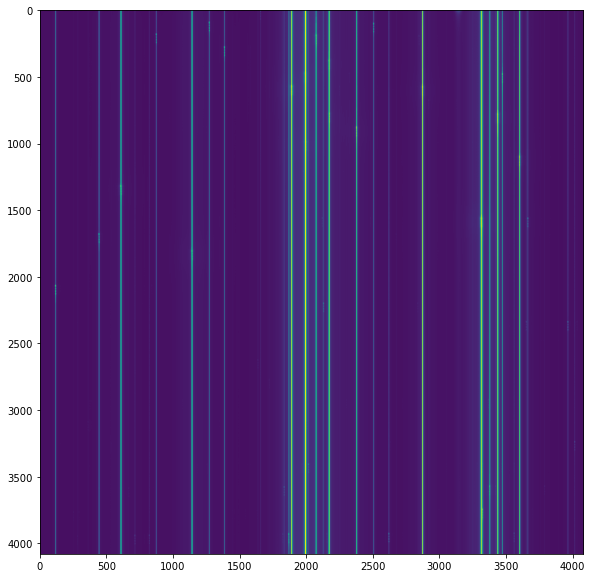

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(green['RED_CCD'].data)

In [38]:
green['RED_CCD'].data

array([[-0.00638123, -0.00606995, -0.00638123, ...,  0.03847717,
         0.03776169,  0.03402527],
       [-0.17439423, -0.17377167, -0.17377167, ...,  0.03672821,
         0.03529724,  0.03299179],
       [-0.13260498, -0.13174896, -0.13065948, ...,  0.03609222,
         0.03354828,  0.03171982],
       ...,
       [ 0.0066925 ,  0.00731506,  0.00677032, ...,  0.03823868,
         0.03648972,  0.03291229],
       [ 0.00661469,  0.00700378,  0.00684814, ...,  0.03768219,
         0.03760269,  0.03299179],
       [ 0.00692596,  0.00739288,  0.00731506, ...,  0.03776169,
         0.03641022,  0.03354828]])

In [47]:
fits.open('/Users/paminabby/Desktop/20220429/post_green/KP.20220429.4390.37_2D.fits')[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'astropy.fits'       / File Originator                                
INSTRUME= 'KPF     '           / Instrument Name                                
DATALVL = '0       '           / Data Product Base Level                        
DATATMP = 'T/F     '           / Data Temporary Intermediate Product            
OBSERVER= 'Classical Observer Name or Queue' / Observer Name                    
TIMESYS = 'UTC     '           / Time Scale                                     
PROGRAM = 'Keck Prog ID'       / Observing Program ID                           
PINAME  = 'Keck PI '           / Program PI Name                                
OBSTYPE = 'Tst     '        